# Data Visualization exploration

In [2]:
###### load packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# from sklearn.preprocessing import binarize
import pickle
import seaborn as sns
from matplotlib.colors import LogNorm, Normalize
from mapseq_fxns import * # import all functions from this script
# from math import log10
from scipy import stats

# random sample consimment between runs
import random



%matplotlib inline


In [3]:

# set-up variables
in_path = '/Volumes/Data/Emily/MAPseq/combined_analysis_M194_M220/'
out_path = '/Volumes/Data/Emily/MAPseq/combined_analysis_M194_M220/output/'

# import metadata
from M194_M220_metadata import *

# import colormaps
from colormaps import blue_cmp, orange_cmp

#### load data
with open(in_path +'M194_M220_OMC_bin4.pkl', 'rb') as f:
    omc_bin = pickle.load(f)

    


In [4]:
# seperate by cell type

omc_type = [sort_by_celltype(omc_bin[i]) for i in range(num_samples)]
omc_pt = [(omc_type[i][omc_type[i]['type']==1000]).drop(["type"], axis=1).reset_index(drop=True) for i in range(num_samples)]
omc_it = [(omc_type[i][omc_type[i]['type']==10]).drop(["type"], axis=1).reset_index(drop=True) for i in range(num_samples)]

omc_mm = []
omc_st = []
omc_pt_mm = []
omc_pt_st = []
omc_it_mm = []
omc_it_st = []
mice_mm=[]
mice_st=[]
dataset_mm = []
dataset_st = []

for i in range(num_samples):
    if metadata.species[i] == 'MMus':
        omc_mm.append(omc_type[i])
        omc_pt_mm.append(omc_pt[i])
        omc_it_mm.append(omc_it[i])
        mice_mm.append(mice[i])
        dataset_mm.append(dataset[i])
    else:
        omc_st.append(omc_type[i])
        omc_pt_st.append(omc_pt[i])
        omc_it_st.append(omc_it[i])
        mice_st.append(mice[i])
        dataset_st.append(dataset[i])

omc_mm_all = pd.concat(omc_mm)
omc_st_all = pd.concat(omc_st)


In [5]:


for i in range(len(omc_it_mm)):
    omc_it_mm[i] = clean_up_data(omc_it_mm[i])

for i in range(len(omc_pt_mm)):
    omc_pt_mm[i] = clean_up_data(omc_pt_mm[i])

for i in range(len(omc_it_st)):
    omc_it_st[i] = clean_up_data(omc_it_st[i])

for i in range(len(omc_pt_st)):
    omc_pt_st[i] = clean_up_data(omc_pt_st[i])

omc_it_mm_all = pd.concat(omc_it_mm)
omc_it_st_all = pd.concat(omc_it_st)

omc_pt_mm_all = pd.concat(omc_pt_mm)
omc_pt_st_all = pd.concat(omc_pt_st)

In [8]:
# need to change type values so that can visualize on heatmap

# change type so .25,.5,.75
mm_type_col = omc_mm_all['type']
mm_replace = np.where(mm_type_col==1000, 0.75, mm_type_col)
mm_replace = np.where(mm_replace==100, 0.5, mm_replace)
mm_replace = np.where(mm_replace==10, 0.25, mm_replace)
omc_mm_all['type'] = mm_replace

# change type so .25,.5,.75
st_type_col = omc_st_all['type']
st_replace = np.where(st_type_col==1000, 0.75, st_type_col)
st_replace = np.where(st_replace==100, 0.5, st_replace)
st_replace = np.where(st_replace==10, 0.25, st_replace)
omc_st_all['type'] = st_replace

print(omc_mm_all.shape)
print(omc_st_all.shape)
omc_mm_all.columns

(71704, 17)
(5114, 17)


Index(['OB', 'OMCi', 'ACAi', 'OMCc', 'ACAc', 'AUD', 'STR', 'TH', 'HY', 'AMY',
       'HIP', 'SNr', 'SCm', 'PG', 'PAG', 'RN', 'type'],
      dtype='object')

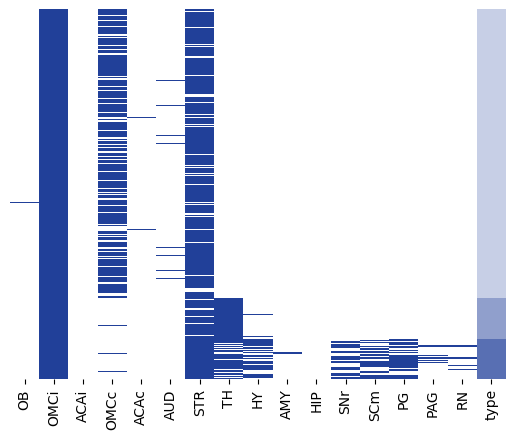

In [14]:
plot = omc_mm_all.sample(1000, random_state=10)

# sort by cell type
plot = plot.sort_values(by=['type']).reset_index(drop=True)

sns.heatmap(plot, cmap=blue_cmp, cbar=False)
plt.gca().get_yaxis().set_visible(False)
# plt.savefig(out_path+"mm_single_heatmap.jpeg", dpi=300)
